<a href="https://colab.research.google.com/github/luanmoon/Praticas_de_machine_learning/blob/main/M%C3%A9todos_baseados_em_dist%C3%A2ncia_am.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Métodos baseados em distância**


## **KNeighborsRegressor**
<font size=3>

Resolvendo a  **regressão** do *dataset* [Consumo de energia na indústria siderúrgica](https://www.kaggle.com/datasets/csafrit2/steel-industry-energy-consumption) com o modelo [`KNeighborsRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html). A partir do **fluxo de trabalho** de aprendizado de máquina. O atributo `CO2(tCO2)` como variável alvo. Objetivo: encontrar o melhor vizinho **k**.
  

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.metrics import mean_squared_error

In [3]:

df = pd.read_csv('/content/drive/MyDrive/IMD3002 - Aprendizado de Máquina Supervisionado/1ª unidade/dataset/Steel_industry_data.csv')

df.head()



,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [4]:
y = df['CO2(tCO2)'].to_numpy() # Pegou a coluna específica como target
y

array([0., 0., 0., ..., 0., 0., 0.])

In [5]:
X = df.drop(['CO2(tCO2)', 'WeekStatus', 'Day_of_week', 'Load_Type', 'date'], axis=1).to_numpy() # Todas menos as que tem strings e a target.
X





array([[3.170e+00, 2.950e+00, 0.000e+00, 7.321e+01, 1.000e+02, 9.000e+02],
       [4.000e+00, 4.460e+00, 0.000e+00, 6.677e+01, 1.000e+02, 1.800e+03],
       [3.240e+00, 3.280e+00, 0.000e+00, 7.028e+01, 1.000e+02, 2.700e+03],
       ...,
       [3.780e+00, 3.170e+00, 7.000e-02, 7.662e+01, 9.998e+01, 8.460e+04],
       [3.780e+00, 3.060e+00, 1.100e-01, 7.772e+01, 9.996e+01, 8.550e+04],
       [3.670e+00, 3.020e+00, 7.000e-02, 7.722e+01, 9.998e+01, 0.000e+00]])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

# normalização:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [7]:

k_values = range(1, 21)

metric_values = []

for k in k_values:

    knn = KNeighborsRegressor(n_neighbors=k) # Modelo de regressão

    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    # medindo a perdormance com os dados de teste, como é regressão, usa o erro médio quadrático
    metric_values.append(mean_squared_error(y_test, y_pred))


Melhor valor de k é 8, com erro quadrático médio  = 0.00.


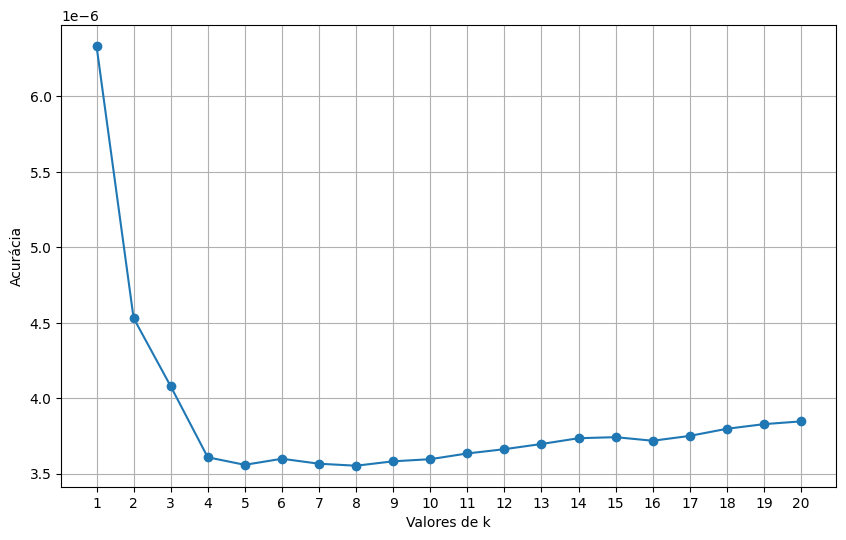

In [8]:
import matplotlib.pyplot as plt

# O melhor valor de k é dado pelo valor mínimo da lista da métrica:
best_k = k_values[np.argmin(metric_values)]

print(f"\nMelhor valor de k é {best_k}, com erro quadrático médio  = {min(metric_values):.2f}.")

plt.figure(figsize=(10, 6))
plt.plot(k_values, metric_values, marker='o')
plt.xticks(k_values)
plt.xlabel('Valores de k')
plt.ylabel('Acurácia')
plt.grid()
plt.show()

## **KNeighborClassifier**
<font size=3>

Resolvendo a **classificação** do *dataset* [`load_wine`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html) com o modelo [`KNeighborClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).
.A partir do fluxo de trabalho de aprendizado de máquina.Objetivo: encontrar o melhor valor de **k**.
  

In [9]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from collections import Counter
wine = load_wine()
wine.target[[10, 80, 140]]
list(wine.target_names)

X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

# normalização:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)




In [10]:
# definindo o modelo:
model = KNeighborsClassifier(n_neighbors=21)

# fitando o modelo:
model.fit(X_train, y_train)

# predição e avaliação:
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)

print(f"Acurácia: {acc:.2f}")

Acurácia: 0.93


In [11]:
# Intervalo de valores de k:
k_values = range(1, 13)

metric_values = []

for k in k_values:

    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    # medindo a perdormance com os dados de teste com acurácia por ser classificação
    metric_values.append(accuracy_score(y_test, y_pred))


Melhor valor de k é 1, com acurácia = 0.98.


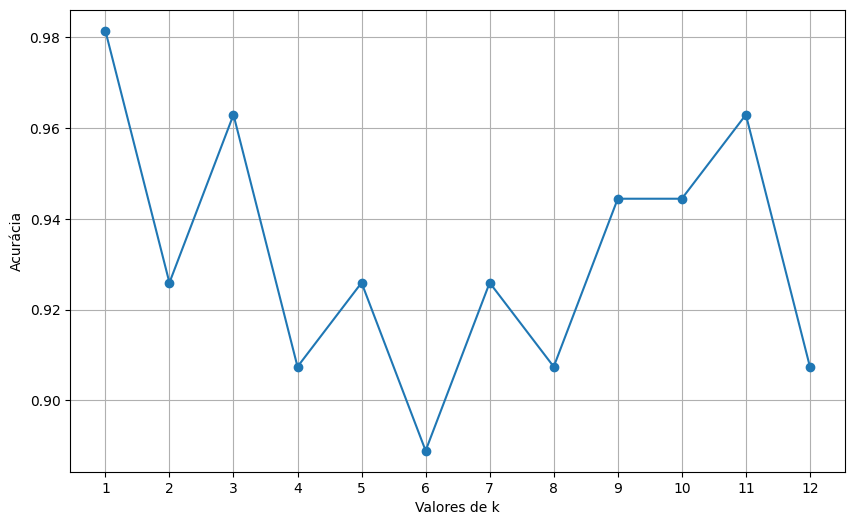

In [12]:
import matplotlib.pyplot as plt

# O melhor valor de k é dado pelo valor máximo da lista da métrica:
best_k = k_values[np.argmax(metric_values)]

print(f"\nMelhor valor de k é {best_k}, com acurácia = {max(metric_values):.2f}.")

plt.figure(figsize=(10, 6))
plt.plot(k_values, metric_values, marker='o')
plt.xticks(k_values)
plt.xlabel('Valores de k')
plt.ylabel('Acurácia')
plt.grid()
plt.show()